## Ref: https://www.kaggle.com/angieashraf/98-6-breast-cancer-classification-using-keras
## Acc要達到80%以上

In [6]:
!wget http://yun.iottalk.tw/riceblast/train_14d.csv
!wget http://yun.iottalk.tw/riceblast/test_14d.csv

--2020-12-30 10:54:01--  http://yun.iottalk.tw/riceblast/train_14d.csv
Resolving yun.iottalk.tw (yun.iottalk.tw)... 140.113.60.21
Connecting to yun.iottalk.tw (yun.iottalk.tw)|140.113.60.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7841897 (7.5M) [application/octet-stream]
Saving to: ‘train_14d.csv’

train_14d.csv       100%[===================>]   7.48M  14.3MB/s    in 0.5s    

2020-12-30 10:54:02 (14.3 MB/s) - ‘train_14d.csv’ saved [7841897/7841897]

--2020-12-30 10:54:02--  http://yun.iottalk.tw/riceblast/test_14d.csv
Resolving yun.iottalk.tw (yun.iottalk.tw)... 140.113.60.21
Connecting to yun.iottalk.tw (yun.iottalk.tw)|140.113.60.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3918763 (3.7M) [application/octet-stream]
Saving to: ‘test_14d.csv’

test_14d.csv        100%[===================>]   3.74M  13.9MB/s    in 0.3s    

2020-12-30 10:54:03 (13.9 MB/s) - ‘test_14d.csv’ saved [3918763/3918763]



In [ ]:
import os
import glob
import pandas as pd
#set working directory
#find all csv files in the folder
#use glob pattern matching -> extension = 'csv'
#save result in list -> all_filenames
extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)
all_filenames = ["train_14d.csv", "test_14d.csv"]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Read data file
BC_df = pd.read_csv("combined_csv.csv")
print("The shape of our dataset :"+str(BC_df.shape))
BC_df.head()

The shape of our dataset :(3551, 175)


,Unnamed: 0,label,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,...,Tc_mean,T cd_mean,RH_count,Precp_count,Precp_f,con_RH,con_Precp,con_good_tmp,Precp_T,month
0,1818,1,-0.750605,-0.503519,-0.728286,1.280705,1.057597,1.128564,-1.080336,-0.530332,...,0.133170,-0.095922,7.0,0.0,0.357143,4.0,0.0,9.0,0.132780,5.0
1,418,0,0.338055,0.233407,0.363242,0.596327,0.131100,0.738148,0.312051,1.040625,...,-0.768858,-0.180420,6.0,0.0,0.571429,3.0,0.0,5.0,0.070082,4.0
2,467,0,0.915710,0.618948,0.894451,-0.043898,0.131100,-0.519859,-0.036046,-0.451784,...,0.518386,0.664559,4.0,0.0,0.142857,2.0,0.0,3.0,0.137909,4.0
3,1145,0,-0.869102,-0.483996,-0.961146,-0.507509,-0.479994,-0.997034,-0.268110,-0.294688,...,-0.508059,0.363536,11.0,0.0,0.714286,8.0,0.0,0.0,0.230141,3.0
4,2831,1,0.893494,0.594546,0.828958,0.198946,0.249376,0.022386,0.428083,0.176599,...,0.090103,0.727933,7.0,0.0,0.428571,4.0,0.0,2.0,0.196216,4.0


In [3]:
BC_df.isnull().any()

Unnamed: 0          False
label               False
StnPres             False
StnPresMax          False
StnPresMin          False
Temperature         False
T Max               False
T Min               False
RH                  False
RHMin               False
Precp               False
Tc                  False
T cd                False
StnPres.1           False
StnPresMax.1        False
StnPresMin.1        False
Temperature.1       False
T Max.1             False
T Min.1             False
RH.1                False
RHMin.1             False
Precp.1             False
Tc.1                False
T cd.1              False
StnPres.2           False
StnPresMax.2        False
StnPresMin.2        False
Temperature.2       False
T Max.2             False
T Min.2             False
                    ...  
StnPres.13          False
StnPresMax.13       False
StnPresMin.13       False
Temperature.13      False
T Max.13            False
T Min.13            False
RH.13               False
RHMin.13    

In [4]:
BC_df.drop("Unnamed: 0",axis=1,inplace=True)
#data.drop("label", axis=1, inplace=True)

In [5]:
BC_df.shape

(3551, 174)

In [6]:
diagnosis_set = set(BC_df['label'])
print(diagnosis_set)

{0, 1}


1    1826
0    1725
Name: label, dtype: int64


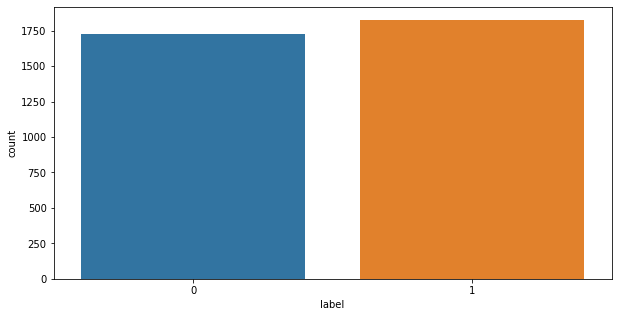

In [7]:
# Checking for imbalance 
BC_count = BC_df['label'].value_counts()
print(BC_count)
plt.figure(figsize=(10,5))
g = sns.countplot(BC_df['label'])
g.set_xticklabels(['0','1'])
plt.show()

In [8]:
X = BC_df.drop(columns={'label'})
X

,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,Precp,Tc,...,Tc_mean,T cd_mean,RH_count,Precp_count,Precp_f,con_RH,con_Precp,con_good_tmp,Precp_T,month
0,-0.750605,-0.503519,-0.728286,1.280705,1.057597,1.128564,-1.080336,-0.530332,-0.307268,0.054213,...,0.133170,-0.095922,7.0,0.0,0.357143,4.0,0.0,9.0,0.132780,5.0
1,0.338055,0.233407,0.363242,0.596327,0.131100,0.738148,0.312051,1.040625,-0.242024,-0.917202,...,-0.768858,-0.180420,6.0,0.0,0.571429,3.0,0.0,5.0,0.070082,4.0
2,0.915710,0.618948,0.894451,-0.043898,0.131100,-0.519859,-0.036046,-0.451784,-0.307268,1.025627,...,0.518386,0.664559,4.0,0.0,0.142857,2.0,0.0,3.0,0.137909,4.0
3,-0.869102,-0.483996,-0.961146,-0.507509,-0.479994,-0.997034,-0.268110,-0.294688,-0.307268,0.724154,...,-0.508059,0.363536,11.0,0.0,0.714286,8.0,0.0,0.0,0.230141,3.0
4,0.893494,0.594546,0.828958,0.198946,0.249376,0.022386,0.428083,0.176599,-0.307268,0.389183,...,0.090103,0.727933,7.0,0.0,0.428571,4.0,0.0,2.0,0.196216,4.0
5,0.737968,0.482300,0.676145,0.353483,0.525354,-0.498169,-1.080336,-1.237263,-0.307268,1.662071,...,0.618877,0.458596,4.0,0.0,0.428571,2.0,0.0,3.0,0.050081,4.0
6,-0.802447,-0.127736,-1.667001,1.346935,1.885532,1.280393,-0.732240,-1.787098,-0.202877,1.226611,...,-0.579839,-0.560661,10.0,0.0,0.500000,10.0,0.0,6.0,0.043086,10.0
7,0.271401,0.174843,0.312303,1.214476,1.136448,1.063495,-0.268110,0.255147,-0.307268,0.288692,...,-0.220942,-0.412789,5.0,0.0,0.285714,3.0,0.0,5.0,0.241832,7.0
8,0.678722,0.340771,0.705250,0.375560,0.545067,0.781528,-0.036046,-0.216140,-0.307268,-0.280758,...,-0.280758,-1.025399,0.0,0.0,0.071429,0.0,0.0,14.0,0.013173,3.0
9,0.500980,0.335892,0.472395,-1.081504,-0.775685,-1.018724,-0.268110,-0.608880,-0.307268,0.255195,...,0.106851,-0.127609,3.0,0.0,0.000000,2.0,0.0,0.0,0.000000,2.0


In [9]:
y = BC_df['label']
y

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       0
8       0
9       0
10      1
11      1
12      0
13      0
14      0
15      0
16      1
17      1
18      0
19      1
20      0
21      1
22      1
23      0
24      0
25      0
26      0
27      0
28      1
29      1
       ..
3521    0
3522    0
3523    0
3524    1
3525    1
3526    1
3527    1
3528    1
3529    0
3530    1
3531    0
3532    0
3533    1
3534    1
3535    1
3536    1
3537    1
3538    1
3539    0
3540    0
3541    1
3542    0
3543    0
3544    0
3545    1
3546    1
3547    0
3548    1
3549    1
3550    0
Name: label, Length: 3551, dtype: int64

In [79]:
# 安裝後要restart kernel
!pip install imblearn

     |████████████████████████████████| 174kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 307kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 22.2MB 22.3MB/s eta 0:00:01    |██████▏                         | 4.3MB 13.9MB/s eta 0:00:02     |████████████▉                   | 8.9MB 13.9MB/s eta 0:00:01     |███████████████████████▋        | 16.4MB 22.3MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [10]:
#using SMOTE from imblearn
import imblearn
from imblearn.combine import SMOTEENN
smote = SMOTEENN(random_state=0)
X_res, y_res = smote.fit_resample(X,y)
print('Resampled dataset shape %s' % y_res.value_counts())

Resampled dataset shape 0    964
1    866
Name: label, dtype: int64


In [11]:
print(y_res)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1800    1
1801    1
1802    1
1803    1
1804    1
1805    1
1806    1
1807    1
1808    1
1809    1
1810    1
1811    1
1812    1
1813    1
1814    1
1815    1
1816    1
1817    1
1818    1
1819    1
1820    1
1821    1
1822    1
1823    1
1824    1
1825    1
1826    1
1827    1
1828    1
1829    1
Name: label, Length: 1830, dtype: int64


In [12]:
enoder = LabelEncoder().fit(y_res)
y_res = enoder.transform(y_res)
# BC_df.head()
y_res

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,
                                test_size=0.2,random_state=0)
print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (1464, 173)
Size of the training set: 1464
Shape of the testing set: (366, 173)
Size of the testing set: 366


In [14]:
scaler = StandardScaler().fit(x_train)
train_scaled = scaler.transform(x_train)
test_scaled = scaler.transform(x_test)

In [17]:
model = Sequential([
    Dense(32 ,activation='relu',input_shape=(173,)),
    Dense(32 ,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                5568      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(train_scaled , y_train 
         ,epochs=100,batch_size=32 )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1464/1464 [==============================] - 7s 5ms/step - loss: 0.6038 - acc: 0.6434
Epoch 2/100
1464/1464 [==============================] - 0s 194us/step - loss: 0.4692 - acc: 0.7971
Epoch 3/100
1464/1464 [==============================] - 0s 142us/step - loss: 0.4133 - acc: 0.8395
Epoch 4/100
1464/1464 [==============================] - 0s 163us/step - loss: 0.3847 - acc: 0.8607
Epoch 5/100
1464/1464 [==============================] - 0s 136us/step - loss: 0.3675 - acc: 0.8675
Epoch 6/100
1464/1464 [==============================] - 0s 146us/step - loss: 0.3558 - acc: 0.8661
Epoch 7/100
1464/1464 [==============================] - 0s 172us/step - loss: 0.3465 - acc: 0.8709
Epoch 8/100
1464/1464 [==============================] - 0s 160us/step - loss: 0.3386 - acc: 0.8723
Epoch 9/100
1464/1464 [==============================] - 0s 175us/step - loss: 0.3314 - acc: 0.8730
Epoch 10/100
1464/1464 [==============================

In [19]:
model.save('model_RiceBlast.h5')

In [20]:
pretrained_model = keras.models.load_model('./model_RiceBlast.h5')
eval_score = pretrained_model.evaluate(test_scaled,y_test)
print('The loss of the evaluation :'+' '+str(eval_score[0]))
print('The accuracy of the evaluation :'+' '+str(eval_score[1]))

366/366 [==============================] - 0s 323us/step
The loss of the evaluation : 0.22091605909209433
The accuracy of the evaluation : 0.9125683050338036


In [21]:
y_pred = pretrained_model.predict_classes(test_scaled)
y_pred

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [22]:
target_list=['0','1']
classification_report(y_true=y_test,y_pred=y_pred
                      ,output_dict = True,target_names=target_list)

{'0': {'precision': 0.9230769230769231,
  'recall': 0.9137055837563451,
  'f1-score': 0.9183673469387756,
  'support': 197},
 '1': {'precision': 0.9005847953216374,
  'recall': 0.9112426035502958,
  'f1-score': 0.9058823529411764,
  'support': 169},
 'accuracy': 0.912568306010929,
 'macro avg': {'precision': 0.9118308591992803,
  'recall': 0.9124740936533204,
  'f1-score': 0.912124849939976,
  'support': 366},
 'weighted avg': {'precision': 0.9126912138128704,
  'recall': 0.912568306010929,
  'f1-score': 0.9126024180163869,
  'support': 366}}

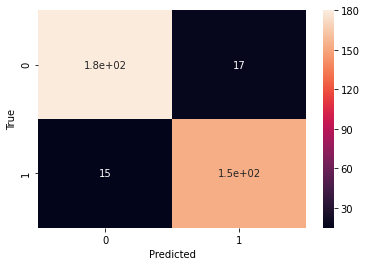

In [23]:
CV = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(CV,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()